 # Magnetic projection
 
On the FEMM application, a geometry consisting of a rectangular NdFeb magnet surrounded by a border of air is constructed and opened. 
 
It looks like this:
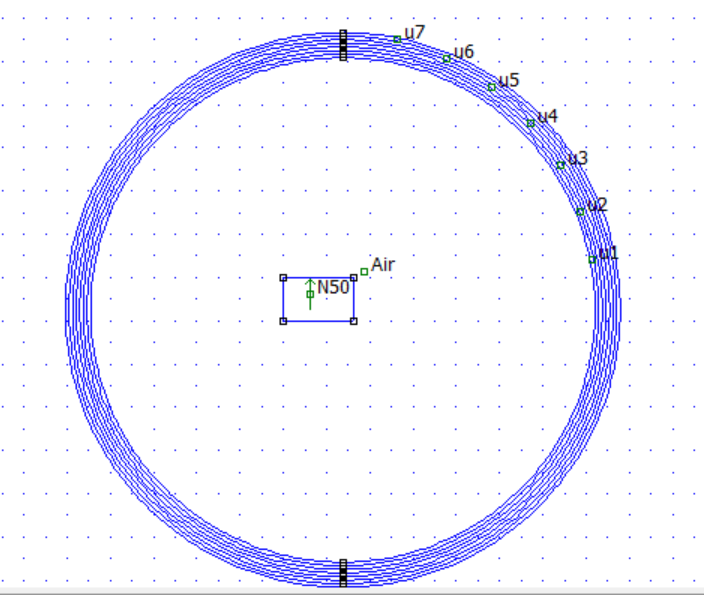

In [2]:
import femm
import matplotlib.pyplot as plt
import numpy as np

femm.openfemm()
femm.opendocument("magneticProjection.fem")

In [3]:
femm.mi_loadsolution()

The solution of this magnetic problem is: 
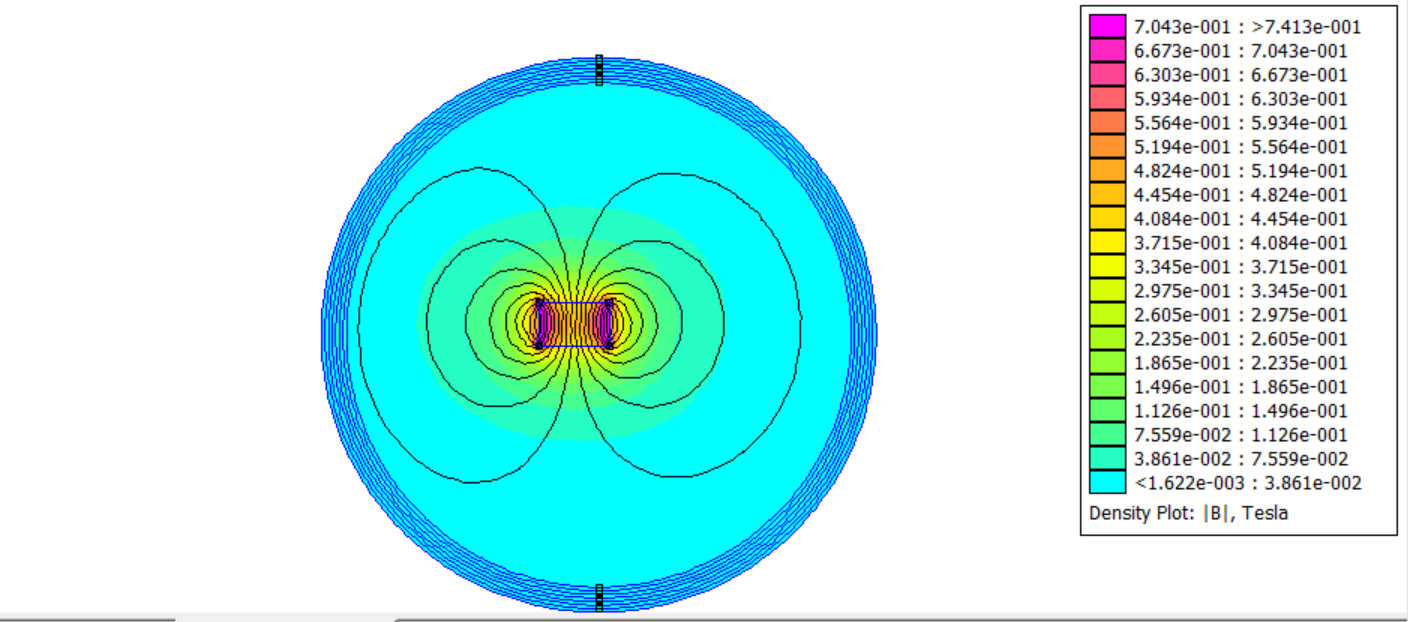

Text(0, 0.5, 'Magnetic field in the X-Direction (Tesla)')

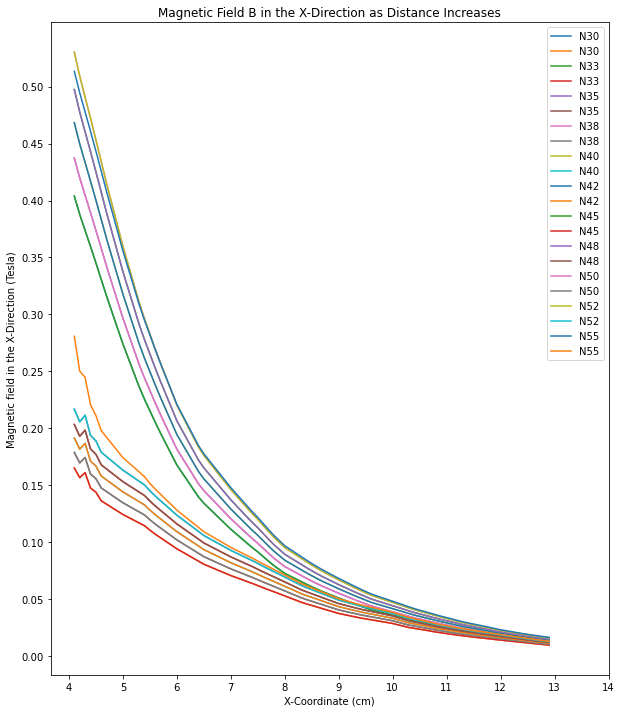

In [6]:
x = np.arange(4.1, 13.0, 0.1)
y = np.arange(4.1, 13.0, 0.1)
b_x = np.empty(89)
b_x_1 = np.empty(89)
b_y = np.empty(89)
b_y_1 = np.empty(89)

magnets = ['N30', 'N33', 'N35', 'N38', 'N40', 'N42', 'N45', 'N48', 'N50', 'N52', 'N55']


plt.figure(figsize = [10,12])


for n in magnets:
    
    femm.mi_selectlabel(0,3)
    
    femm.mi_setblockprop(n)
    
    femm.mi_analyze() 

    femm.mi_loadsolution()
    
    for i, k in enumerate(x):
    
        b_x[i] = femm.mo_getb(k,3)[0]
        b_x_1[i] = femm.mo_getb(k,1)[0]
        #for j, m in enumerate(y):


    plt.plot(x,b_x, label = n)
    plt.plot(x,b_x_1, label = n)

    
plt.legend()
plt.xticks(np.arange(4, 15, step=1))
plt.yticks(np.arange(0, 0.55, step=0.05))
plt.title("Magnetic Field B in the X-Direction as Distance Increases")
plt.xlabel("X-Coordinate (cm)")
plt.ylabel("Magnetic field in the X-Direction (Tesla)")    


Text(0, 0.5, 'Differentiated Magnetic Field (Tesla)')

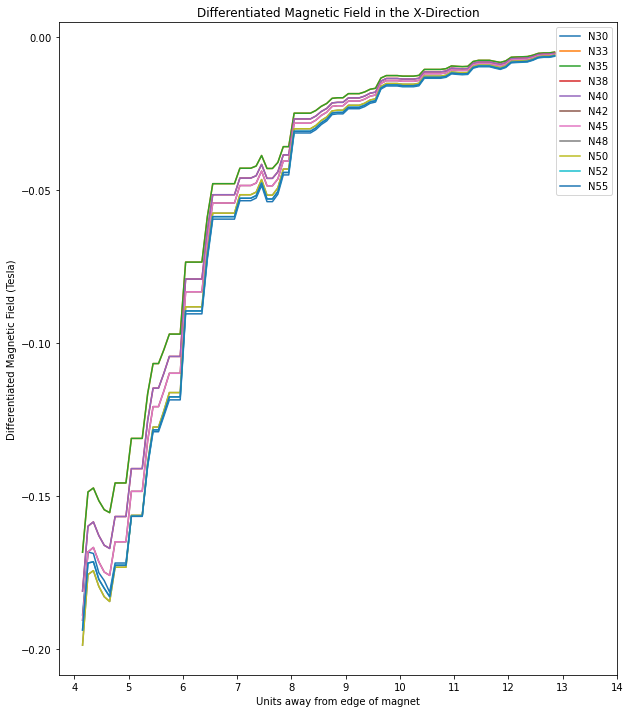

In [31]:
magnets = ['N30', 'N33', 'N35', 'N38', 'N40', 'N42', 'N45', 'N48', 'N50', 'N52', 'N55']

plt.figure(figsize = [10,12])

for n in magnets:
    
    femm.mi_selectlabel(0,3)
    
    femm.mi_setblockprop(n)
    
    femm.mi_analyze() 

    femm.mi_loadsolution()
    
    for i, k in enumerate(x):
    
        b_x[i] = femm.mo_getb(k,3)[0]
        b_y[i] = femm.mo_getb(k,3)[1]
        #for j, m in enumerate(y):
    
    y_diff = np.empty(89)

    y_diff = np.diff(b_x) / np.diff(x)
    x_diff = (x[:-1] + x[1:]) / 2


    plt.plot(x_diff,y_diff, label = n)
    
    
plt.legend()
plt.xticks(np.arange(4, 15, step=1))
plt.yticks(np.arange(-0.20, 0.01, step=0.05))
plt.title("Differentiated Magnetic Field in the X-Direction")
plt.xlabel("Units away from edge of magnet")
plt.ylabel("Differentiated Magnetic Field (Tesla)")

Text(0, 0.5, 'Acceleration in the X-Direction (cm/s^2)')

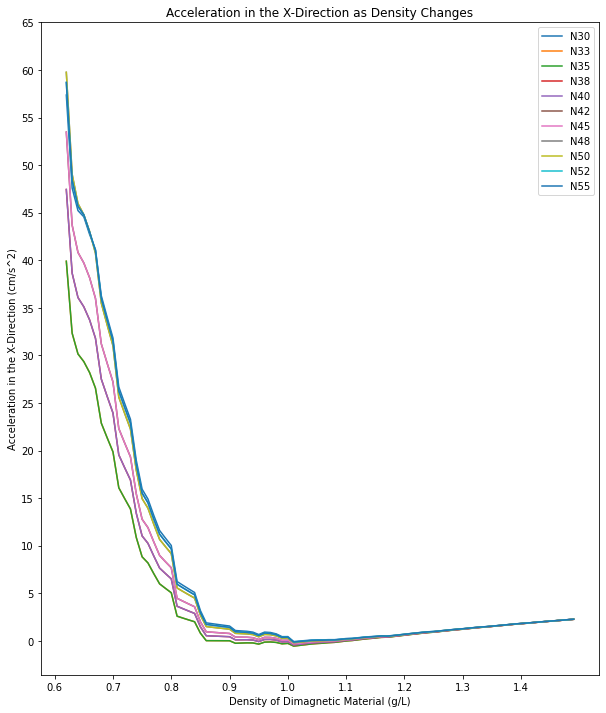

In [49]:

import math

## constants
magnetic_susceptibility_solution = 5.48E-4
density_solution = 1.148
permeability_vaccuum = (4.0E-7)*math.pi
g = 9.8


magnets = ['N30', 'N33', 'N35', 'N38', 'N40', 'N42', 'N45', 'N48', 'N50', 'N52', 'N55']

plt.figure(figsize = [10,12])

for n in magnets:
    
    femm.mi_selectlabel(0,3)
    
    femm.mi_setblockprop(n)
    
    femm.mi_analyze() 

    femm.mi_loadsolution()
    
    for i, k in enumerate(x):
    
        b_x[i] = femm.mo_getb(k,3)[0]
        b_y[i] = femm.mo_getb(k,3)[1]
        #for j, m in enumerate(y):
    
    y_diff = np.empty(89)

    y_diff = np.diff(b_x) / np.diff(x)
    x_diff = (x[:-1] + x[1:]) / 2

    x_plastic_density = np.arange(0.62, 1.5, 0.01)
    y_acceleration = -(magnetic_susceptibility_solution/(permeability_vaccuum*x_plastic_density))*(y_diff*b_x[1:]) \
                    + (1-(density_solution/x_plastic_density))*g


    plt.plot(x_plastic_density, y_acceleration, label = n)

plt.legend()
plt.xticks(np.arange(0.6, 1.5, step=0.1))
plt.yticks(np.arange(0, 70, step=5))
plt.title("Acceleration in the X-Direction as Density Changes")
plt.xlabel("Density of Dimagnetic Material (g/L)")
plt.ylabel("Acceleration in the X-Direction (cm/s^2)")

Text(0, 0.5, 'Distance traveled in the X-Direction after 1 second (cm)')

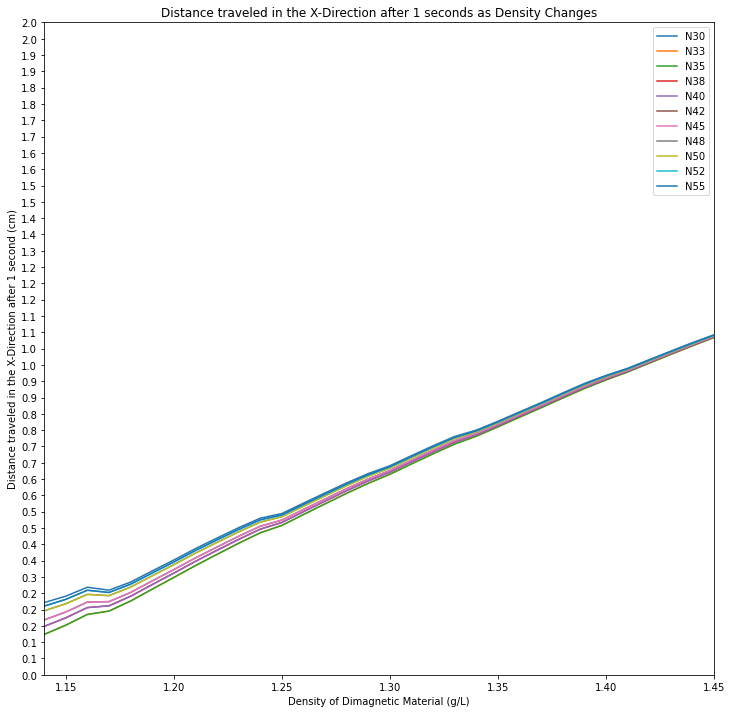

In [59]:
magnets = ['N30', 'N33', 'N35', 'N38', 'N40', 'N42', 'N45', 'N48', 'N50', 'N52', 'N55']

plt.figure(figsize = [12,12])

for n in magnets:
    
    femm.mi_selectlabel(0,3)
    
    femm.mi_setblockprop(n)
    
    femm.mi_analyze() 

    femm.mi_loadsolution()
    
    for i, k in enumerate(x):
    
        b_x[i] = femm.mo_getb(k,3)[0]
        b_y[i] = femm.mo_getb(k,3)[1]
        #for j, m in enumerate(y):
    
    y_diff = np.empty(89)

    y_diff = np.diff(b_x) / np.diff(x)
    x_diff = (x[:-1] + x[1:]) / 2

    x_plastic_density = np.arange(0.62, 1.5, 0.01)
    y_acceleration = -(magnetic_susceptibility_solution/(permeability_vaccuum*x_plastic_density))*(y_diff*b_x[1:]) + \
                        (1-(density_solution/x_plastic_density))*g

    #distance = v0t + 1/2at^2
    
    t = 1
    
    y_distance = (y_acceleration/2)*(t)**2
    
    plt.plot(x_plastic_density, y_distance, label = n)

plt.legend()
plt.xticks(np.arange(0.6, 1.5, step=0.05))
plt.xlim(1.14,1.45)

plt.yticks(np.arange(0, 1000, step=0.05))
plt.ylim(0,2)

plt.title("Distance traveled in the X-Direction after 1 seconds as Density Changes")
plt.xlabel("Density of Dimagnetic Material (g/L)")
plt.ylabel("Distance traveled in the X-Direction after 1 second (cm)")

In [13]:
femm.mo_selectblock(0,3)
femm.mi_setblockprop('N30')
femm.mi_loadsolution()

In [16]:
femm.mo_selectblock(0,3)

In [18]:
femm.mi_setblockprop('N40')

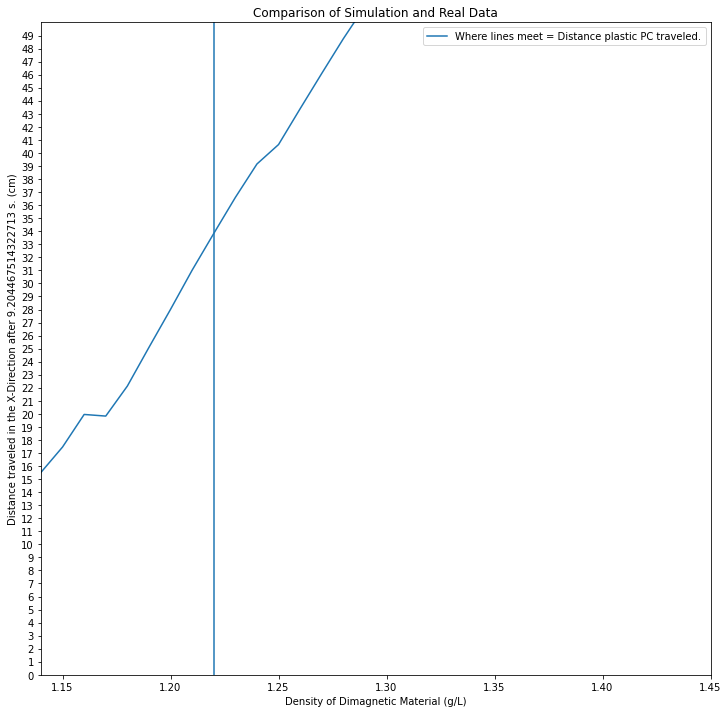

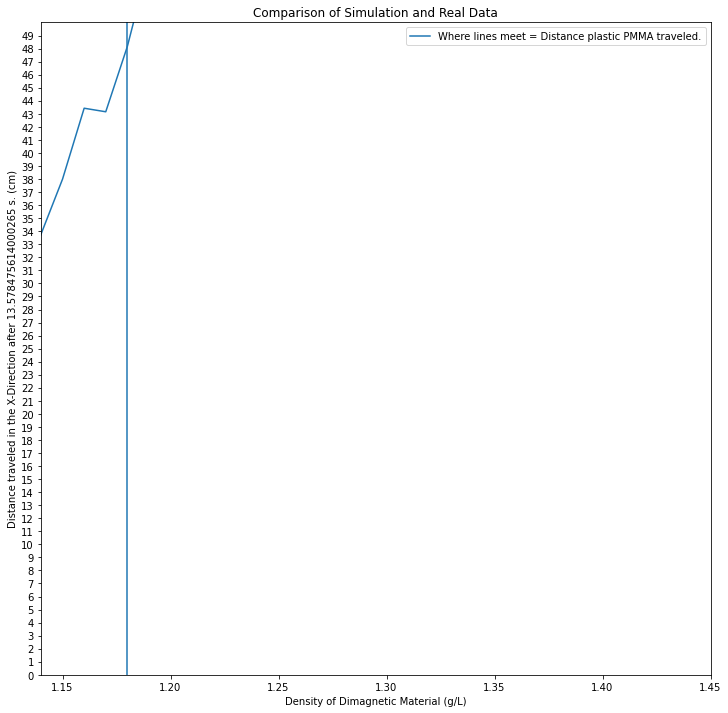

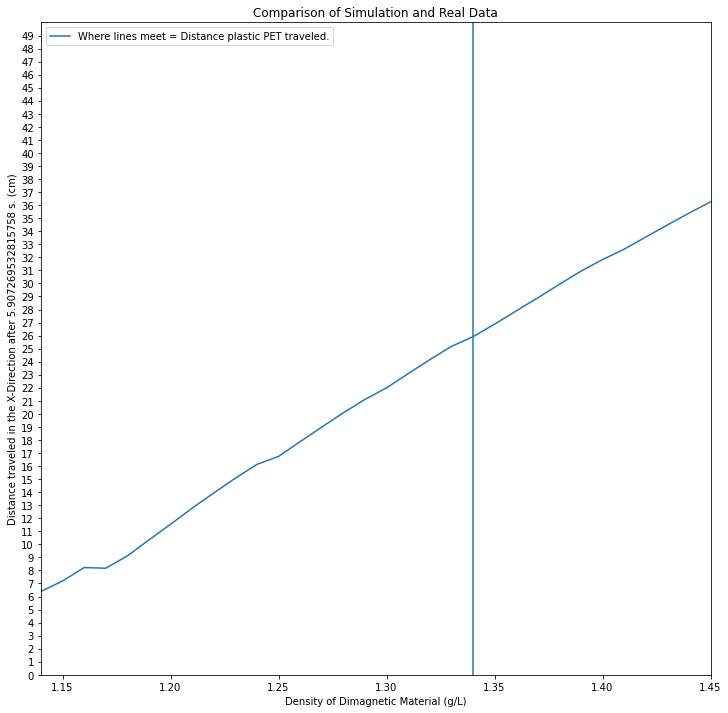

In [75]:
densities_in_paper = [1.22, 1.18, 1.34]
plastics_in_paper = ['PC', 'PMMA', 'PET']




for j, n in enumerate(densities_in_paper):
    
    plt.figure(figsize = [12,12])

    femm.mi_selectlabel(0,3)
    
    femm.mi_setblockprop('N45')
    
    femm.mi_analyze() 

    femm.mi_loadsolution()
    
    for i, k in enumerate(x):
    
        b_x[i] = femm.mo_getb(k,3)[0]
        b_y[i] = femm.mo_getb(k,3)[1]
        #for j, m in enumerate(y):
    
    y_diff = np.empty(89)

    y_diff = np.diff(b_x) / np.diff(x)
    x_diff = (x[:-1] + x[1:]) / 2

    x_plastic_density = np.arange(0.62, 1.5, 0.01)
    acceleration = -(magnetic_susceptibility_solution/(permeability_vaccuum*x_plastic_density))*(y_diff*b_x[1:]) + \
                        (1-(density_solution/x_plastic_density))*g

    #distance = v0t + 1/2at^2
    
    

    
    # distance = v0t + 1/2at^2
    
    # height of container in paper is 25 mm
    
    # acceleration in y direction = 1-(pm/ps)*g
    
    # time it reaches bottom: 2.5 = 1/2(avertical)t**2
    
    t = math.sqrt((2.5*2)/(1-(density_solution/n)))
    
    distance = (acceleration/2)*(t)**2
    
    plt.plot(x_plastic_density, distance, label = "Where lines meet = Distance plastic " + plastics_in_paper[j] + " traveled.")
    
    plt.axvline(x=n)
    
    plt.xticks(np.arange(0.6, 1.5, step=0.05))
    plt.xlim(1.14,1.45)

    plt.yticks(np.arange(0, 50, step=1))
    plt.ylim(0,50)

    plt.legend()
    plt.title("Comparison of Simulation and Real Data")
    plt.xlabel("Density of Dimagnetic Material (g/L)")
    plt.ylabel("Distance traveled in the X-Direction after " + str(t) + " s. (cm)")
    